<a href="https://colab.research.google.com/github/NavedMansuri/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#Importing libraries & loading Dataset

---



In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing library 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


from sklearn.model_selection import GridSearchCV 

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# # Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing dataset
# df=pd.read_csv('/content/SeoulBikeData.csv',encoding = "ISO-8859-1")

In [ ]:
# # Importing dataset
df=pd.read_csv('/content/drive/MyDrive/assignment /SeoulBikeData.csv',encoding = "ISO-8859-1")

# Dataset Information and summary

---



In [ ]:
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Check shape of dataset
df.shape

(8760, 14)

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [ ]:
# check null value
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# check Duplicate
len(df[df.duplicated()])

0

In [ ]:
# check unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

# Data Pre-Processing

---



**Checking info about dataframe**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**The "Date" column of our dataframe holds datetime information, but in the given data set, its data type is an object, so let's convert the datatype of "Date".**

---



In [ ]:
df["Date"]= pd.to_datetime(df["Date"])

In [ ]:
# Extracting day,month,year from date column
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
# df.drop(columns=['Date'],axis=1,inplace=True)

In [ ]:
#add month, day_of_week columns
for df in [df]:
    # df['month'] = df['Date'].dt.month
    df['day_of_week'] = df['Date'].dt.dayofweek   

Day of week
 * 0: Monday
 * 1: Tuesday
 * 2: Wednesday
 * 3: Thursday
 * 4: Friday
 * 5: Saturday
 * 6: Sunday

In [ ]:
# engineering new feature 'weekend' from day_of_week
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if x>4 else 0)

In [ ]:
df.sample(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,day_of_week,weekend
4587,2018-10-06,150,3,18.6,78,0.8,1997,14.6,0.00,0.0,0.0,Summer,No Holiday,Yes,2018,10,6,5,1
4425,2018-03-06,831,9,22.7,39,0.7,1880,8.0,1.91,0.0,0.0,Summer,No Holiday,Yes,2018,3,6,1,0
8657,2018-11-26,1156,17,11.4,48,0.4,706,0.7,0.24,0.0,0.0,Autumn,No Holiday,Yes,2018,11,26,0,0


In [ ]:
df.drop(columns=['Date'],axis=1,inplace=True)
df.drop(columns=['Day'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  Year                       8760 non-null   int64

##Checking correlation




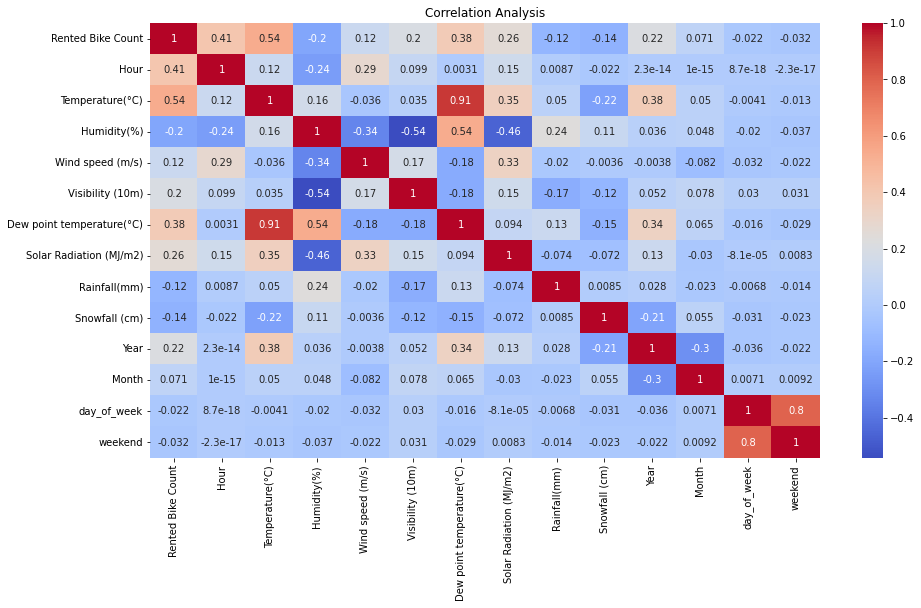

In [ ]:
# Correlation analysis
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')



*   Correlation heatmap shows that temperature is highly correlated with dew point temperature, so there is collinearity between the two.
*   To remove multicollinearity from our data we need to remove either tempreture column or Dew point tempreture column
*   **Let's check VIF and remove Dew point tempreture/temperature from our dataframe.**
---

## Checking VIF

In [ ]:
# Definig function for VIF
def cal_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   return(vif)

In [ ]:
cal_vif(df[[i for i in df.describe().columns if i not in ['Dew point temperature(°C)','Rented Bike Count','Day', 'Month', 'Year']]])


,variables,VIF
0,Hour,3.955864
1,Temperature(°C),3.248065
2,Humidity(%),5.915106
3,Wind speed (m/s),4.612145
4,Visibility (10m),5.085606
5,Solar Radiation (MJ/m2),2.276399
6,Rainfall(mm),1.079576
7,Snowfall (cm),1.122222
8,day_of_week,8.588900
9,weekend,3.808363


After drop 'Dew point temperature' VIF is in acceptable range, so that drop that column.

---




In [ ]:
# remove Dew point tempreture column
df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

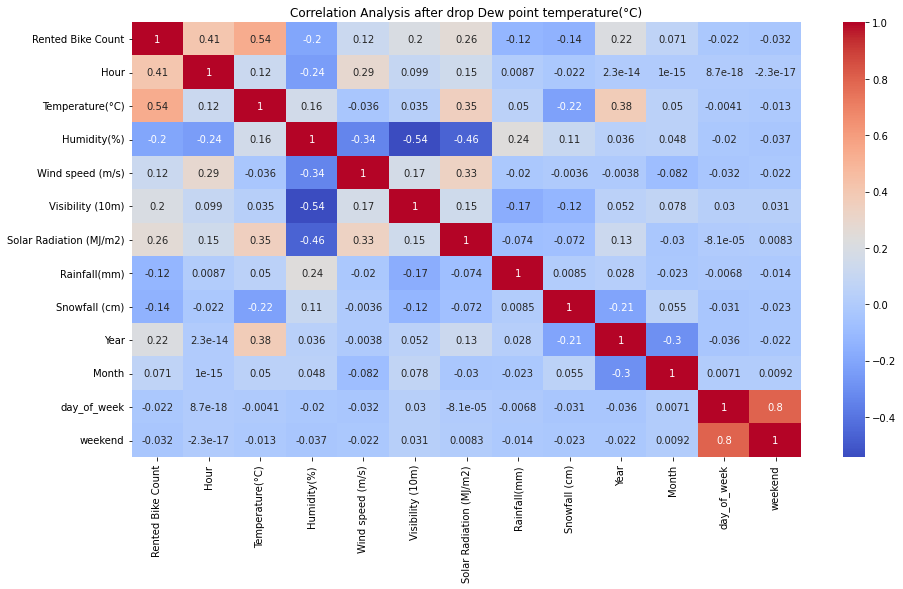

In [ ]:
# Checking correlation after dropping Dew point temperature(°C)
plt.figure(figsize=(15,8))
plt.title('Correlation Analysis after drop Dew point temperature(°C)')
sns.heatmap(df.corr(),annot=True, cmap='coolwarm')

# Exploratory Data Analysis

---



###  Analyzing the distribution of dependent variable


In [ ]:
# defining dependent variable separately
dependent_variable = ['Rented Bike Count']

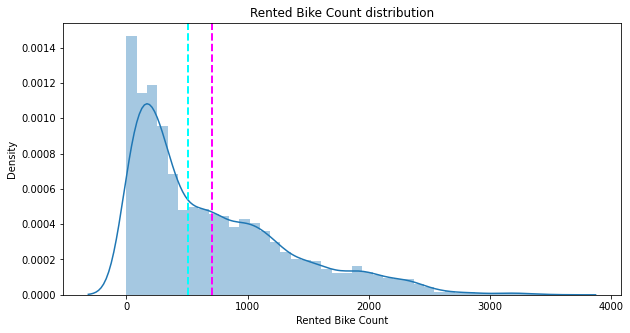

In [ ]:
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(df[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

**dependent variable is positively skewed. To get better predictions, it is ideal if the dependent variable is almost normally distributed.
To achieve this, we can transform the data by log, sqrt, etc.**

**Log transformation**

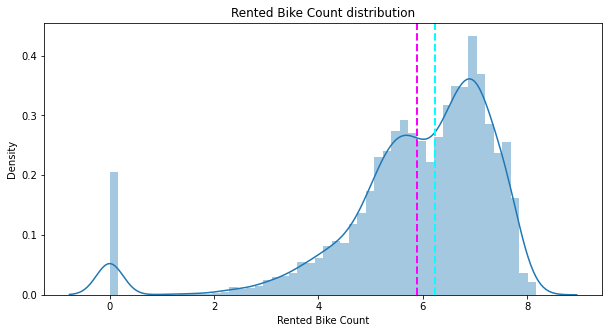

In [ ]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)

**Square-root transformation**

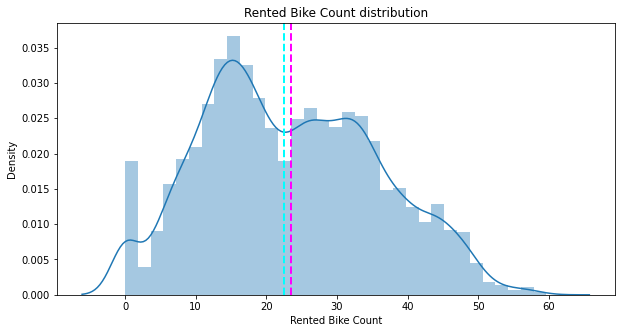

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(df['Rented Bike Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(df['Rented Bike Count']).median(), color='cyan', linestyle='dashed', linewidth=2)

### Analyzing the distribution of continuous independent variables

In [ ]:
continuous_var = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

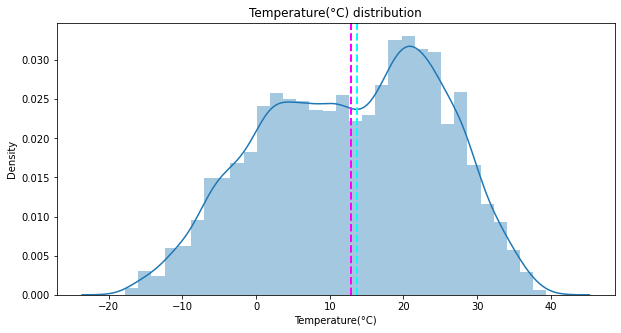

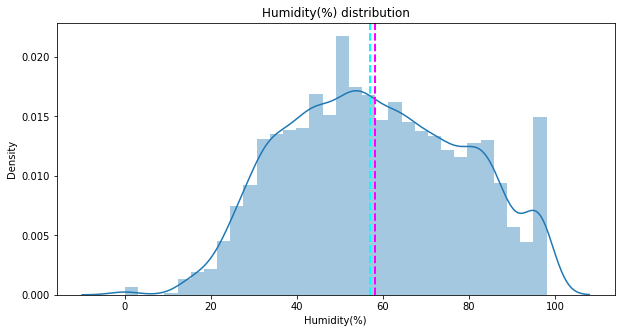

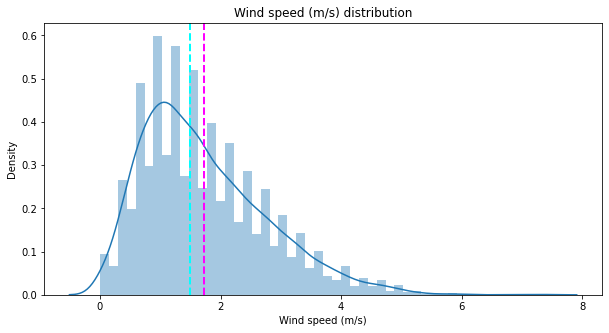

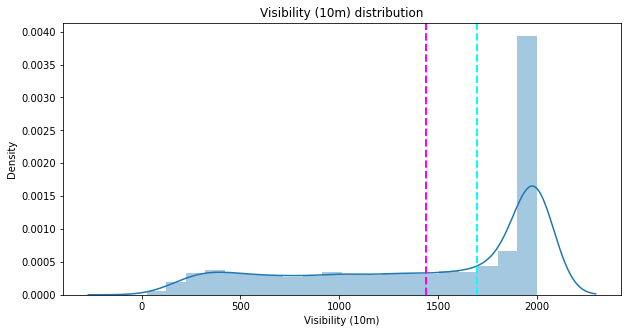

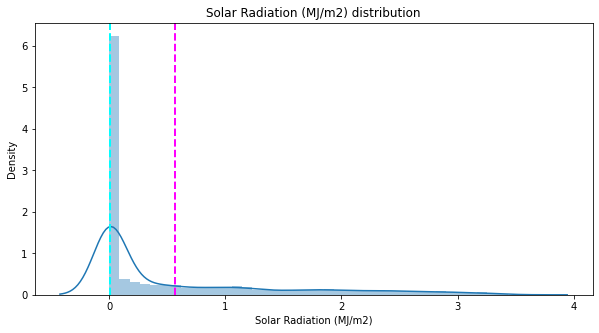

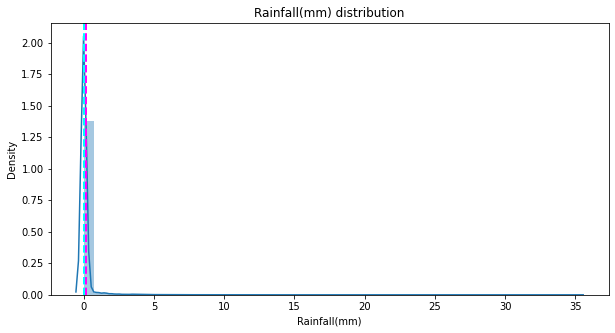

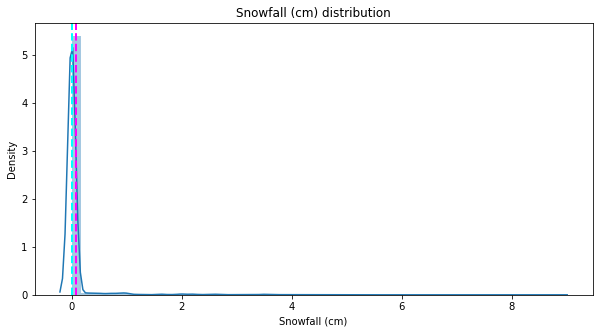

In [ ]:
# Analyzing the distribution of the continuous independent variables
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### Analyzing relationship between dependent variable and continuous independent variables

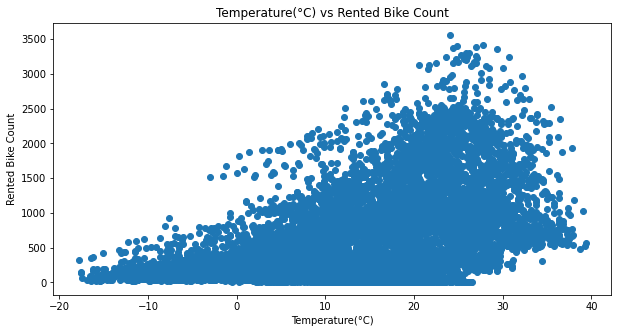

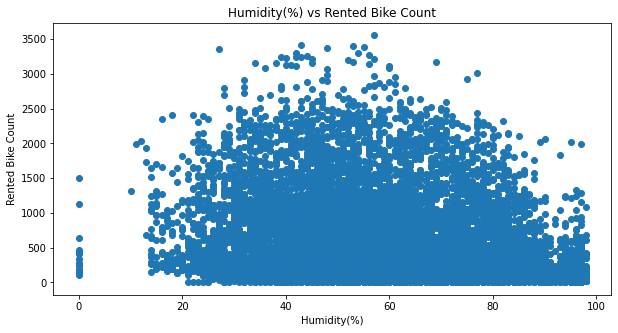

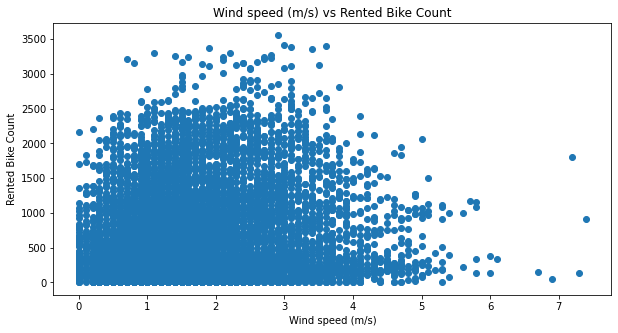

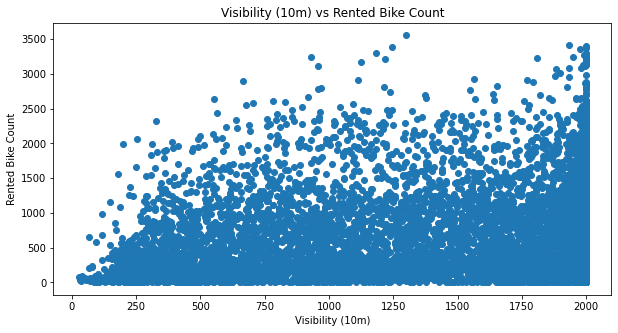

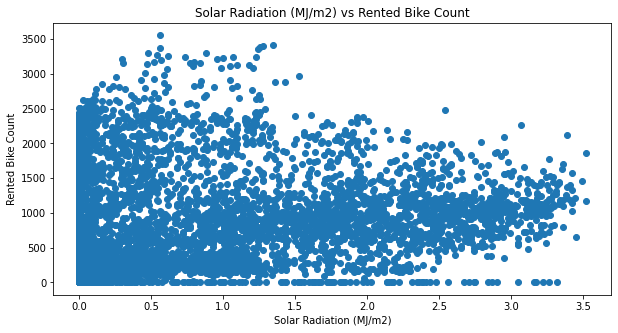

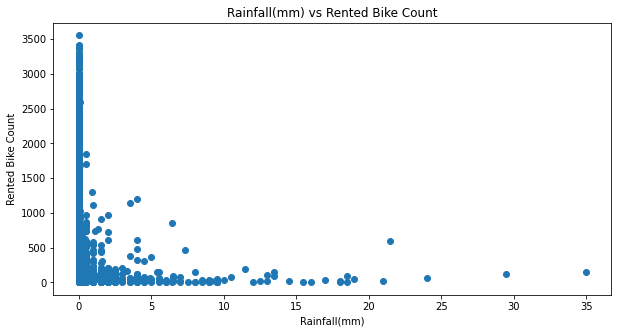

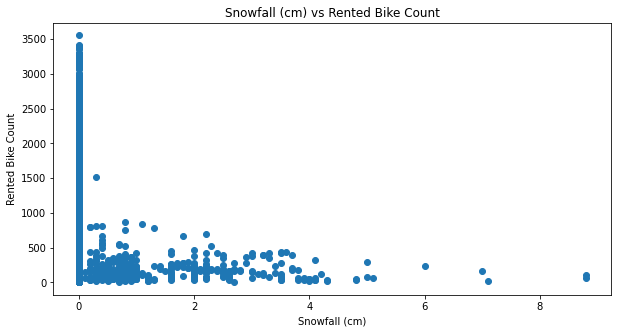

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in continuous_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=df)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()



*   Positively correlated variables: temperature, windspeed, visibility, solar radiation.

*   Negatively correlated variables: humidity, rainfall, snowfall.



### Analyzing relationship between dependent variable and categorical independent variables:

In [ ]:
# defining categorical independent variables separately
categorical_var = ['Hour','Seasons', 'Holiday', 'Functioning Day', 'Month', 'day_of_week', 'weekend']

In [ ]:
blb = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)

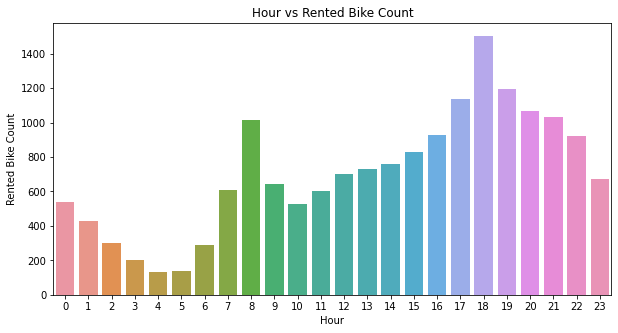

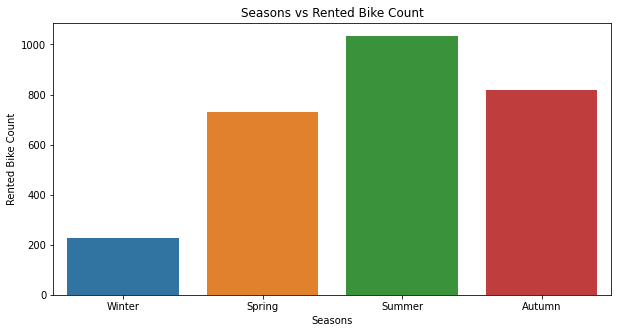

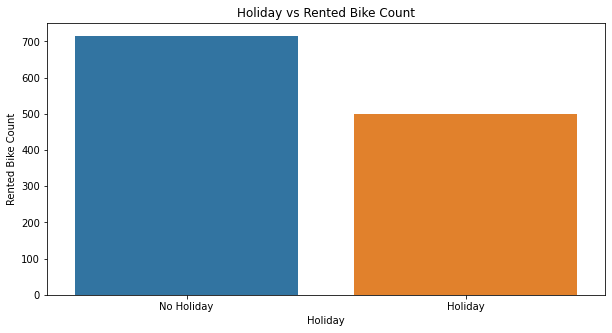

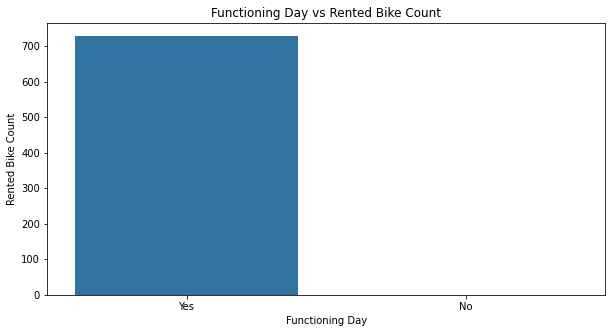

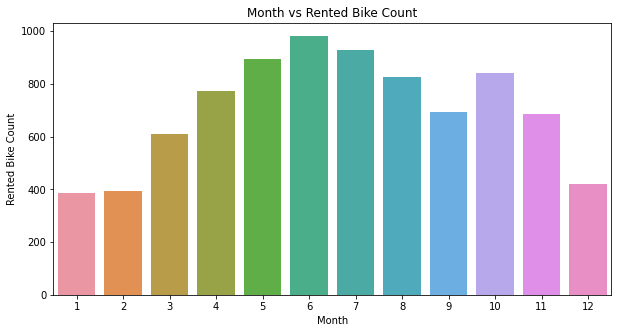

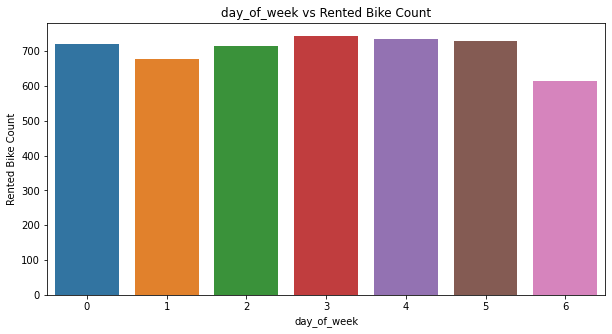

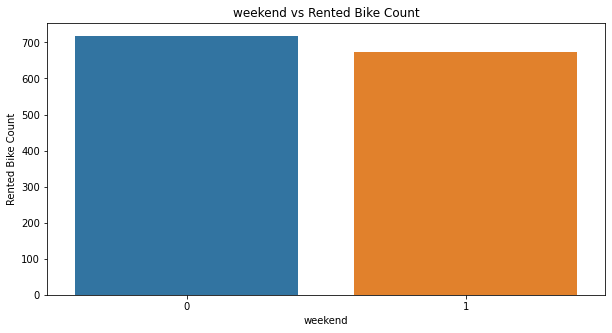

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in categorical_var:
  plt.figure(figsize=(10,5))
  sns.barplot(data=df,x=i,y=dependent_variable[0],ci=None)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

### Bike demand throughout the day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Temperature(°C)          8760 non-null   float64
 3   Humidity(%)              8760 non-null   int64  
 4   Wind speed (m/s)         8760 non-null   float64
 5   Visibility (10m)         8760 non-null   int64  
 6   Solar Radiation (MJ/m2)  8760 non-null   float64
 7   Rainfall(mm)             8760 non-null   float64
 8   Snowfall (cm)            8760 non-null   float64
 9   Seasons                  8760 non-null   object 
 10  Holiday                  8760 non-null   object 
 11  Functioning Day          8760 non-null   object 
 12  Year                     8760 non-null   int64  
 13  Month                    8760 non-null   int64  
 14  day_of_week             

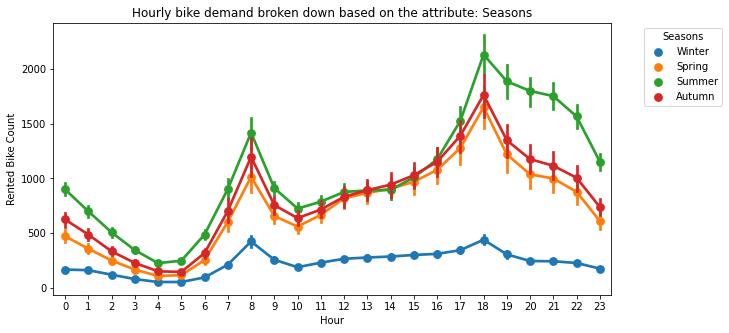

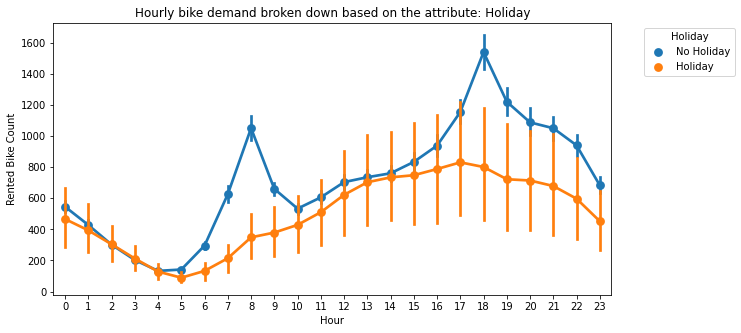

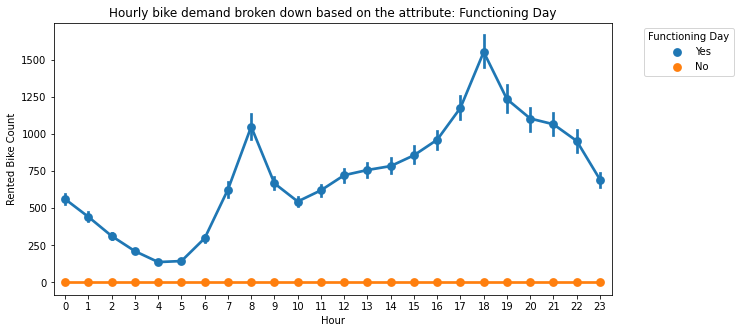

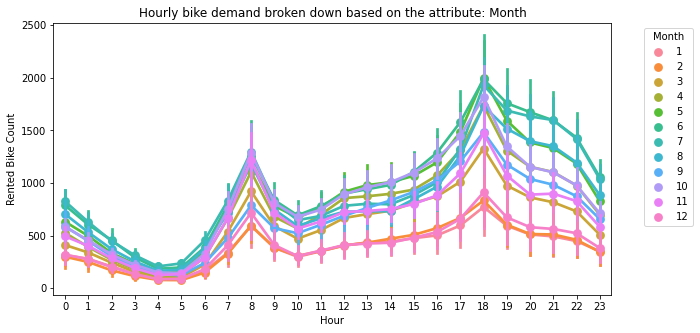

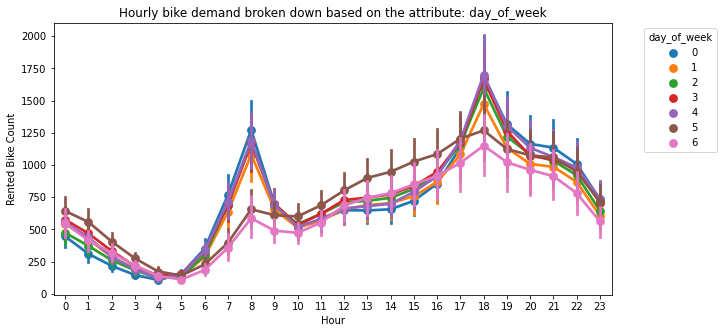

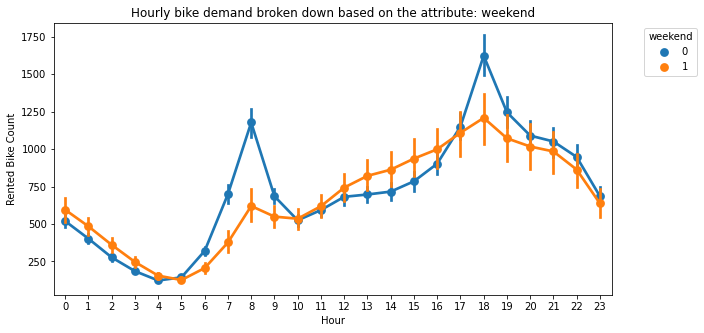

In [ ]:
for i in categorical_var:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

**Conclusion**

**From Seasons v/s rented bike**
* It is obvious that there is a high demand for rented bikes during the summer and a low demand during the winter months..

**From Holiday v/s rented bike**
* It is clear that demand for holiday bikes is lessening and office or no holiday bike counts are high.

**From day of week v/s rented bike**
* Sunday has very less demand while Saturday has a high demand comparative weekday.

### ploting Regression plot of each columns of dataset v/s rented bike count columns


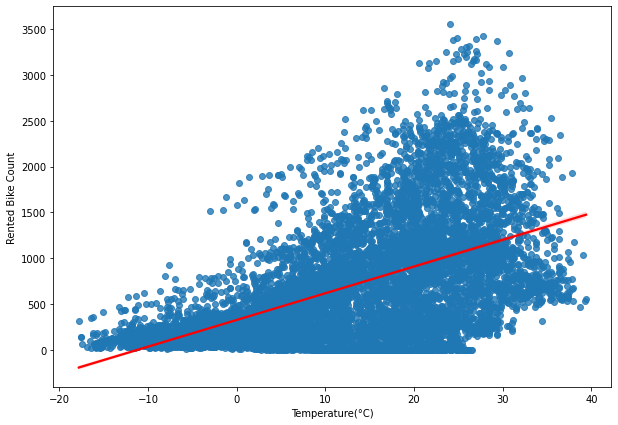

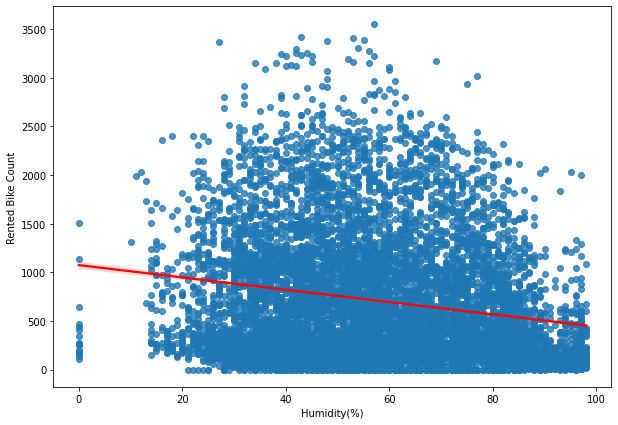

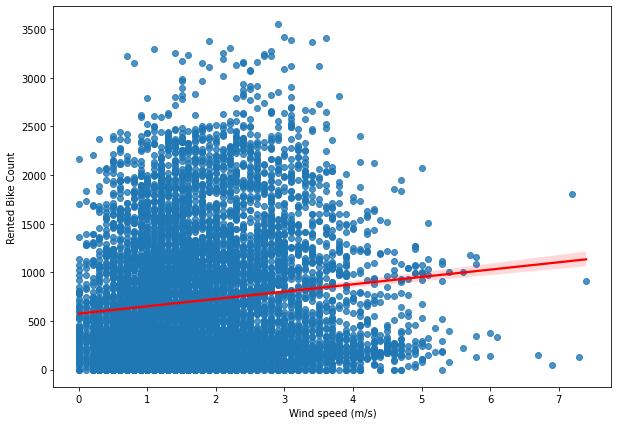

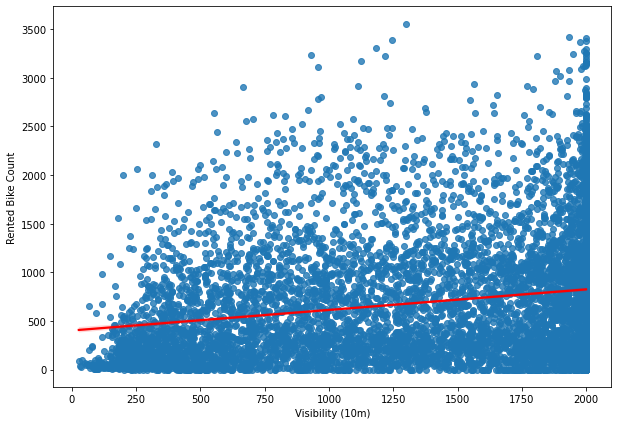

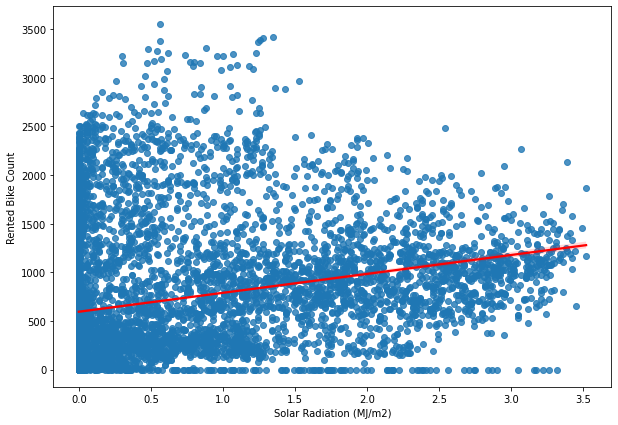

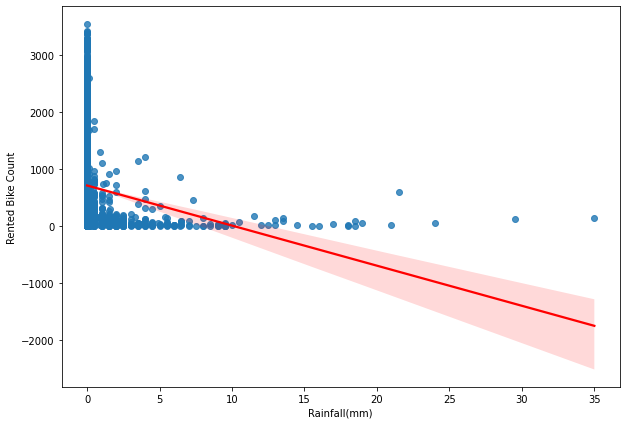

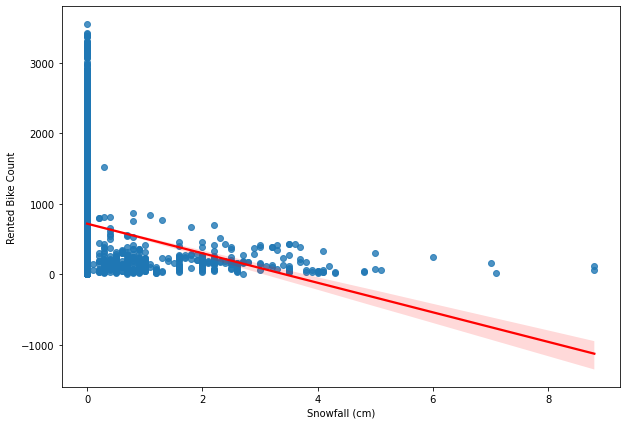

In [ ]:
# ploting Regression plot of each columns of dataset v/s rented bike count columns

for col in continuous_var[:]:
  plt.figure(figsize=(10,7))
  if col == 'Rented Bike Count':
    pass
  else:
    sns.regplot(x=df[col],y=df["Rented Bike Count"],line_kws={"color": "red"})
  
  plt.show()

# Feature engineering

---



*   Converting categorical attributes ("Hour", "Seasons","Holiday","Functioning Day","Month","weekend") to numerical attributes




In [ ]:
bike_df = df.copy()


In [ ]:
bike_df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Year', 'Month', 'day_of_week', 'weekend'],
      dtype='object')

In [ ]:
bike_df = pd.get_dummies(bike_df, columns=["Hour", "Seasons","Holiday","Functioning Day","Month","weekend"], prefix=["Hour", "Seasons","Holiday","Functioning Day","Month","weekend"])


In [ ]:
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.0,504.50,1065.25,3556.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.5,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.0,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.9,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.0,1698.00,2000.00,2000.00
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.0,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.0,0.00,0.00,8.80
Year,8760.0,2017.915068,0.278796,2017.0,2018.0,2018.00,2018.00,2018.00
day_of_week,8760.0,3.021918,1.999994,0.0,1.0,3.00,5.00,6.00


# Train-Test Split

In [ ]:
dependent_variable = 'Rented Bike Count'
independent_variables = list(set(bike_df.columns.tolist()) - {dependent_variable})

In [ ]:
# Create the data of independent variables
X = bike_df[independent_variables].values

In [ ]:
# Create the dependent variable data
y = np.sqrt(bike_df[dependent_variable].values)

In [ ]:
print(X.shape)
print(y.shape)

(8760, 55)
(8760,)


In [ ]:
# Splitting the dataset into the Training set and Test set for model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 55)
(1752, 55)
(7008,)
(1752,)


In [ ]:
# Transforming data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Linear Regression

In [ ]:
# Fitting Linear Regression to the Training set
regressor=LinearRegression(fit_intercept=True)
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_prediction_train = regressor.predict(X_train)


In [ ]:
y_prediction_test= regressor.predict(X_test)


In [ ]:
print(regressor.intercept_)


-471067773601650.25


In [ ]:
print(regressor.coef_)


[ 5.05170687e+13  8.46810686e+13  5.05170687e+13  5.05170687e+13
 -1.26201420e+14  5.05170687e+13  5.05170687e+13 -1.39991796e+13
  3.34901794e+14  5.05170687e+13  8.46810686e+13 -1.39991796e+13
  1.41168441e+14 -1.34018555e+01  8.46810686e+13 -1.26201420e+14
  3.34901794e+14 -1.26201420e+14  5.05170687e+13 -1.26201420e+14
  2.61271973e+01  5.05170687e+13  5.05170687e+13 -9.54711914e-01
  5.05170687e+13  5.05170687e+13  1.03900146e+00  5.05170687e+13
 -1.26201420e+14 -1.26201420e+14  4.62929234e-02  5.05170687e+13
  3.99296969e+00 -1.26201420e+14  5.05170687e+13 -7.81250000e-03
  5.05170687e+13  5.05170687e+13  5.05170687e+13 -1.26201420e+14
  5.05170687e+13 -1.26201420e+14  5.05170687e+13 -1.26201420e+14
 -1.26201420e+14  5.05170687e+13  5.05170687e+13  8.46810686e+13
 -5.31875000e+01  5.05170687e+13  5.05170687e+13 -2.65625000e+00
 -1.26201420e+14  5.05170687e+13  1.41168441e+14]


In [ ]:
#Actual rented bike array
y_test[1:10]



array([24.08318916, 15.03329638, 12.84523258, 25.41653005, 13.78404875,
        7.68114575, 14.76482306, 34.95711659, 25.59296778])

In [ ]:
#Predicted rented bike array
y_prediction_test[1:10]

array([23.   , 22.875, 17.625, 37.375, 20.   , 23.375, 19.   , 32.125,
       17.25 ])

In [ ]:
#Evalution metrices on train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_prediction_train*y_prediction_train))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train*y_train,y_prediction_train*y_prediction_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_prediction_train*y_prediction_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 114736.0
RMSE : 339.0
R2 score: 0.724
Adjusted R2 :  0.715


In [ ]:
#Evaluation metrices on test data
MSE  = np.round(mean_squared_error(y_test*y_test,y_prediction_test*y_prediction_test),2)
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test*y_test,y_prediction_test*y_prediction_test),3)
print("R2 score:" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test*y_test,y_prediction_test*y_prediction_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 112969.76
RMSE : 336.11
R2 score: 0.73
Adjusted R2 :  0.721


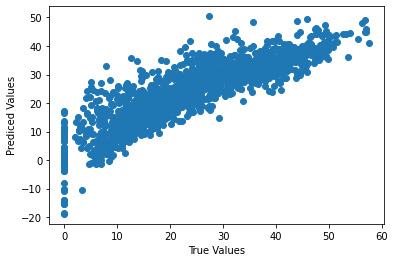

In [ ]:
#Analysing Predicted & True Values
plt.scatter(y_test,y_prediction_test)
plt.xlabel('True Values'), plt.ylabel('Prediced Values')
plt.show()

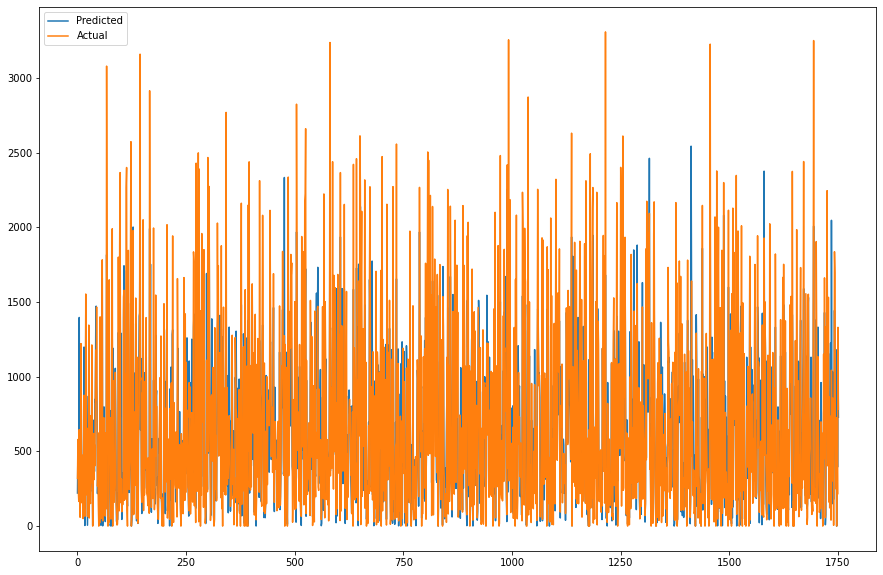

In [ ]:
#creating plot between actual and predicted value
plt.figure(figsize=(15,10))
plt.plot(y_prediction_test*y_prediction_test)
plt.plot((np.array(y_test*y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Implementing Elasic Net regulerization[link text](https://)

---



In [ ]:
#importing elastic net 
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.8)

In [ ]:
#fitting data
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.01, l1_ratio=0.8)

In [ ]:
#making prediction on test data
y_pred_en = elasticnet.predict(X_test)

In [ ]:
#Evaluating metrices on test data
MSE  = np.round(mean_squared_error((y_test*y_test), (y_pred_en*y_pred_en)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score((y_test*y_test), (y_pred_en*y_pred_en)),3)
print("R2 :" ,r2)

MSE : 122364.0
RMSE : 350.0
R2 : 0.708




---

## Cross validation and Hyperparameter tunning


---




In [ ]:
#Cross validation and hyper parameter tunning 
from sklearn.model_selection import GridSearchCV
elastic = ElasticNet()
parameters = {'alpha': [1e-30,1e-28,1e-26,1e-24,1e-22,1e-20,1e-18,1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40],'l1_ratio':[.0001,.001,.01,.1,.2,0.3,0.4,0.5,0.6,0.7,0.8,.9,.10,.11,.12,.13,.14,.15,.20,.25,.30,.35]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='r2',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-30, 1e-28, 1e-26, 1e-24, 1e-22, 1e-20,
                                   1e-18, 1e-15, 1e-13, 1e-10, 1e-08, 1e-05,
                                   0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 4, 5, 6,
                                   7, 8, 9, 10, 15, 20, 25, 30, ...],
                         'l1_ratio': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4,
                                      0.5, 0.6, 0.7, 0.8, 0.9, 0.1, 0.11, 0.12,
                                      0.13, 0.14, 0.15, 0.2, 0.25, 0.3, 0.35]},
             scoring='r2')

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)


In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.8}

Using  {'alpha': 0.0001, 'l1_ratio': 0.8}  the negative mean squared error is:  0.7544845039503334


In [ ]:
MSE  =np.round(mean_squared_error((y_test*y_test), (y_pred_elastic*y_pred_elastic)))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 = np.round(r2_score((y_test*y_test), (y_pred_elastic*y_pred_elastic)),3)
print("R2 :" ,r2)

MSE : 112589.0
RMSE : 336.0
R2 : 0.731


In [ ]:
resi_error = y_test-y_pred_elastic


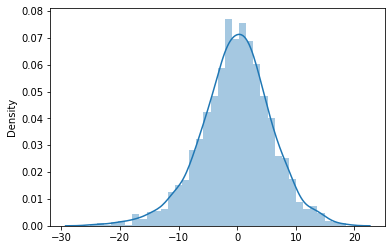

In [ ]:
sns.distplot(resi_error)




---

# Polynomial Model


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Applying Polynomial Linear Regression
# degree 2
poly_reg = PolynomialFeatures(degree = 2,include_bias=True)
#Transforming into Polynomial
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg = LinearRegression()
#Fitting the training dataset
lin_reg.fit(X_poly, y_train)

LinearRegression()

In [ ]:
#Prediction on training & testing dataset
y_pred_poly_train = lin_reg.predict(X_poly)
y_pred_poly_test=lin_reg.predict(X_poly_test)

In [ ]:
#Evaluation metrices on train data
MSE  =np.round(mean_squared_error(y_train*y_train,y_pred_poly_train*y_pred_poly_train))
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE))
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train),3)
print("R2 score:" ,r2)
A_r2=np.round(1-(1-r2_score(y_train*y_train,y_pred_poly_train*y_pred_poly_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",A_r2)

MSE : 40506.0
RMSE : 201.0
R2 score: 0.902
Adjusted R2 :  0.899


In [ ]:
#Evaluation metrices on test data
MSE  = np.round(mean_squared_error(y_test*y_test,y_pred_poly_test*y_pred_poly_test),2)
print("MSE :" , MSE)

RMSE =np.round(np.sqrt(MSE),2)
print("RMSE :" ,RMSE)

r2 =np.round(r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test),3)
print("R2 score:" ,r2)
Adjusted_R2=np.round(1-(1-r2_score(y_test*y_test,y_pred_poly_test*y_pred_poly_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
print("Adjusted R2 : ",Adjusted_R2)

MSE : 49107.14
RMSE : 221.6
R2 score: 0.883
Adjusted R2 :  0.879


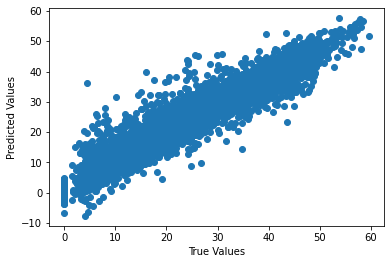

In [ ]:
#Visualising predicted and true values
plt.scatter(y_train,y_pred_poly_train)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

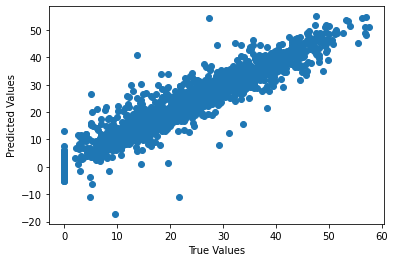

In [ ]:
#Visualising True & Predicted Values
plt.scatter(y_test,y_pred_poly_test)
plt.xlabel('True Values'), plt.ylabel('Predicted Values')
plt.show()

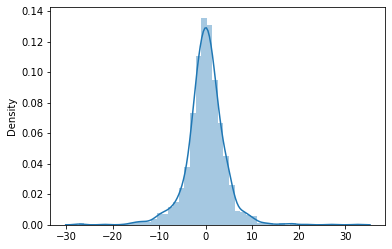

In [ ]:
# residual error
e_poly = y_test - y_pred_poly_test 
#Residual Analysis
sns.distplot(e_poly)
plt.show()

# Decision tree model


In [ ]:
feature_columns = bike_df.drop(['Rented Bike Count'] ,axis =1)

In [ ]:
decision_regressor = DecisionTreeRegressor()
decision_regressor.fit(X_train, y_train)

#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

KeyError: ignored

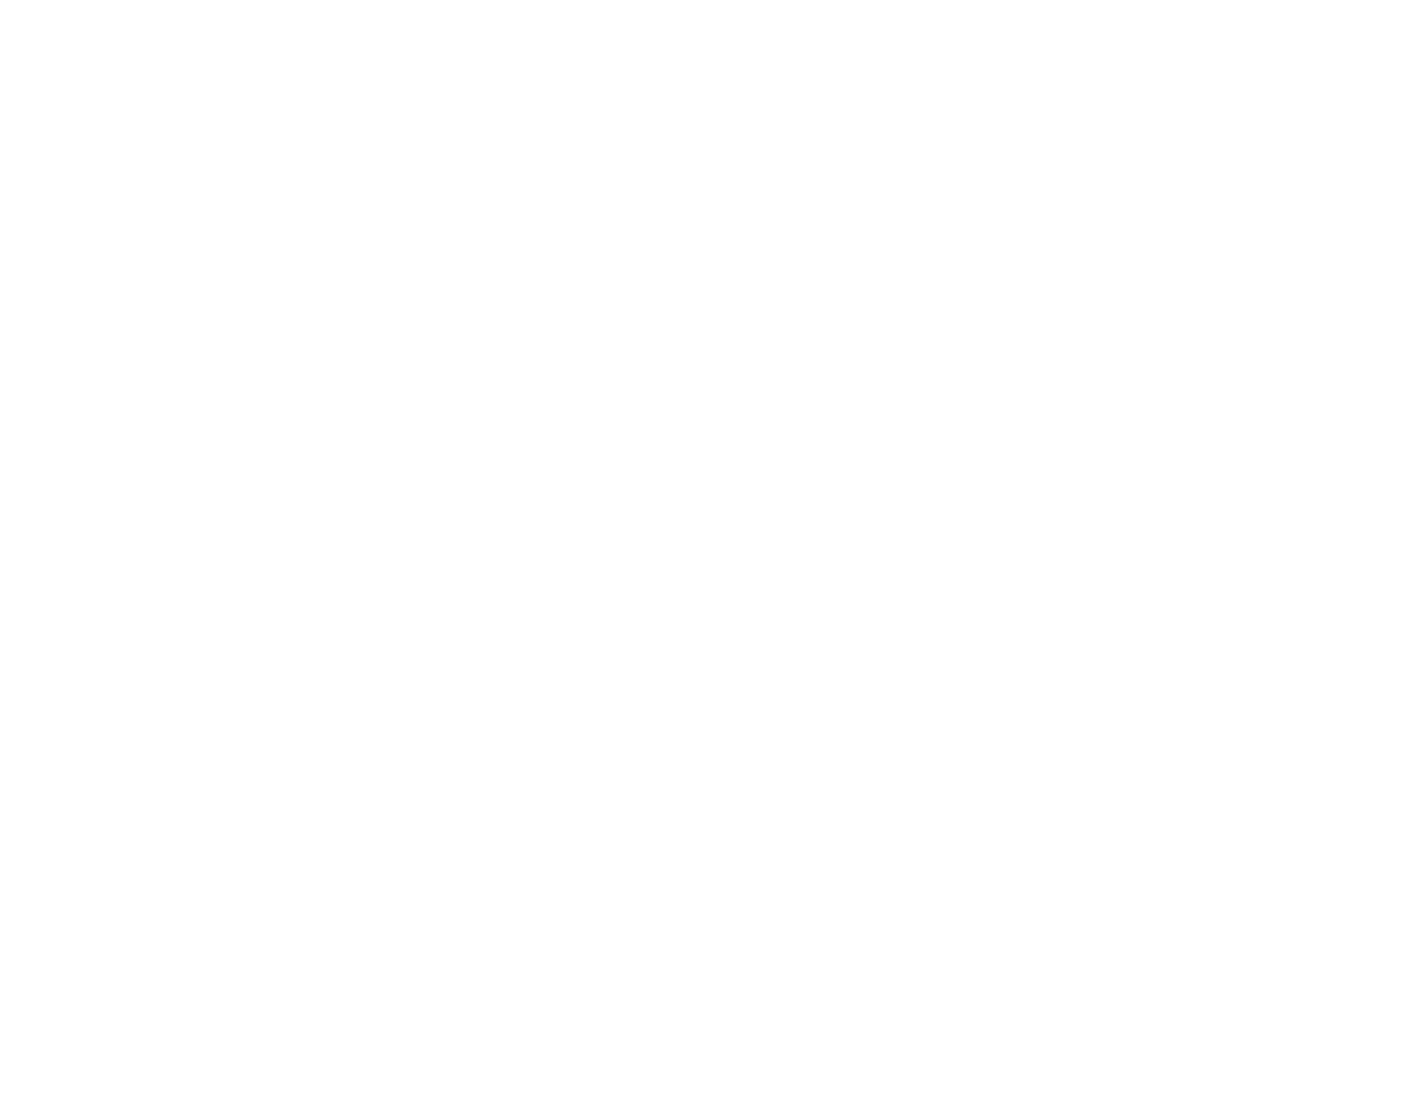

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_regressor, 
                   feature_names=feature_columns,  
                   class_names=y,
                   filled=True)